In [1]:
import pandas as pd
train = pd.read_csv('/Users/vickiyew/Documents/Capstone/Data Set/train_FD001.txt',sep=" ",header=None)
test = pd.read_csv('/Users/vickiyew/Documents/Capstone/Data Set/test_FD001.txt',sep=" ",header=None)

In [2]:
# renaming columns
## used "s<sensor_number>" for simplicity
columns = ['unit_number','time_in_cycles','setting_1','setting_2','setting_3','s1','s2','s3','s4','s5','s6','s7','s8',
           's9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21', '26', '27' ]
train.columns = columns
test.columns = columns


In [3]:
# since the last 2 columns do not contain any (useful) values (all null values), drop the columns
train = train.drop(['26', '27'], axis = 1)
test = test.drop(['26', '27'], axis = 1)
train.head()

,unit_number,time_in_cycles,setting_1,setting_2,setting_3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
# calculating RUL
rul = pd.DataFrame(train.groupby('unit_number')['time_in_cycles'].max()).reset_index()
rul.columns = ['unit_number', 'max']
train = train.merge(rul, on=['unit_number'], how='left')
train['RUL'] = train['max'] - train['time_in_cycles']
train.drop('max', axis=1, inplace=True)

train.head()



,unit_number,time_in_cycles,setting_1,setting_2,setting_3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [5]:
# import true RUL of test data
y_true = pd.read_csv('/Users/vickiyew/Documents/Capstone/Data Set/RUL_FD001.txt',delim_whitespace=True,names=["RUL"])
y_true["unit_number"] = y_true.index
y_true.head()

,RUL,unit_number
0,112,0
1,98,1
2,69,2
3,82,3
4,91,4


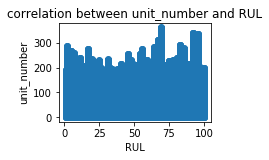

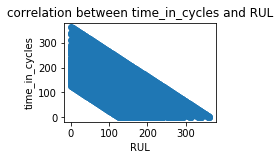

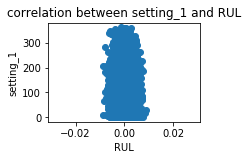

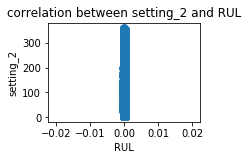

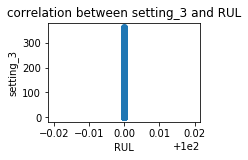

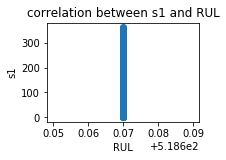

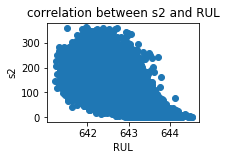

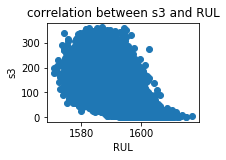

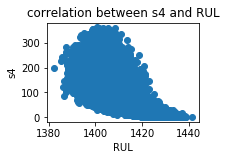

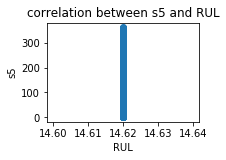

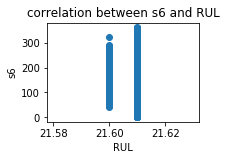

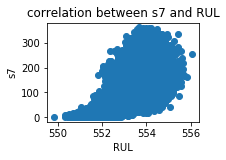

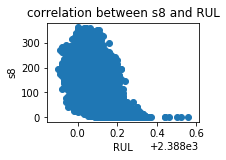

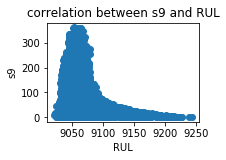

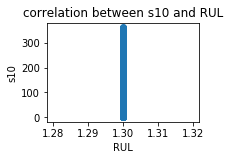

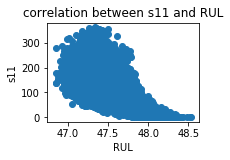

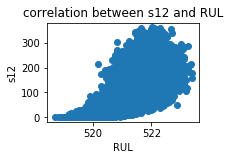

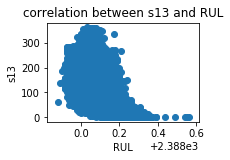

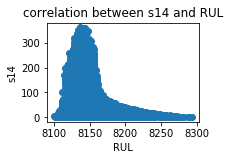

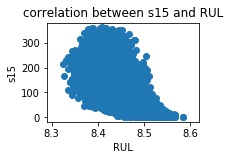

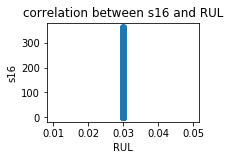

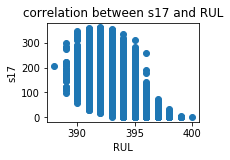

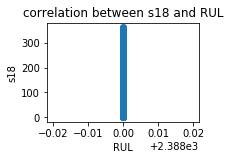

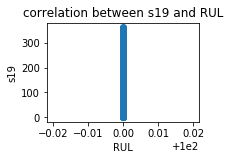

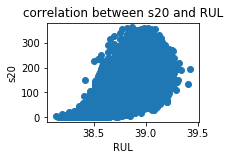

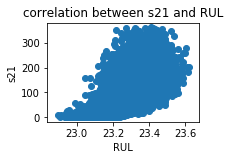

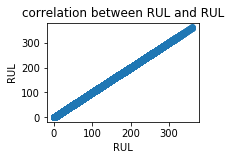

In [24]:

#to plot the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

for column in train.columns:
    plt.figure()
    plt.subplot(2, 2, 1)
    plt.scatter(train[column], train['RUL'])
    plt.title('correlation between '+column+' and RUL')
    plt.xlabel('RUL')
    plt.ylabel(column)
    plt.show()
    

In [6]:
to_drop = ['s1', 's5', 's10', 's16', 's18', 's19', 'setting_3', 'unit_number', 'time_in_cycles']
X_train = train.drop(to_drop, axis = 1)
y_train = X_train.pop('RUL')
X_test = test.groupby('unit_number').last().reset_index().drop(to_drop, axis=1)


In [27]:
y_train.head()

0    191
1    190
2    189
3    188
4    187
Name: RUL, dtype: int64

## Examining feature importance

In [41]:
from sklearn import ensemble
rf = ensemble.RandomForestRegressor()
single_rf = ensemble.RandomForestRegressor(n_estimators = 200, max_depth = 15)
single_rf.fit(X_train, y_train)
y_pred = single_rf.predict(X_train)

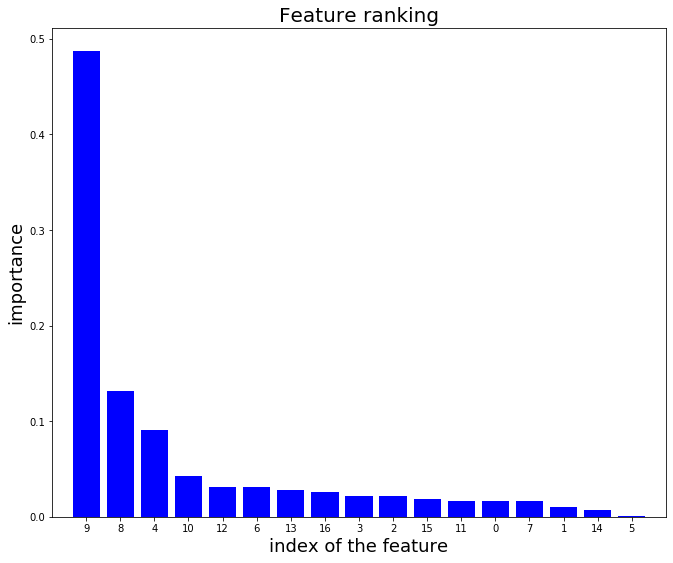

s11    0.487397
s9     0.131875
s4     0.091080
s12    0.042988
s14    0.031621
s7     0.031570
s15    0.027859
s21    0.025847
s3     0.022173
s2     0.021256
dtype: float64


In [43]:
# graph feature importance
import matplotlib.pyplot as plt
import numpy as np
importances = single_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns    
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), indices) #feature_names, rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()
# list feature importance
important_features = pd.Series(data=single_rf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features.head(10))

In [44]:
y_pred

array([163.19887097, 172.80568637, 178.82985523, ...,   3.99143477,
         2.05044353,   0.82981911])

In [7]:
y_true_new = [true[0] for true in y_true.values.tolist()]

In [54]:
np.array(y_true_new)

array([112,  98,  69,  82,  91,  93,  91,  95, 111,  96,  97, 124,  95,
       107,  83,  84,  50,  28,  87,  16,  57, 111, 113,  20, 145, 119,
        66,  97,  90, 115,   8,  48, 106,   7,  11,  19,  21,  50, 142,
        28,  18,  10,  59, 109, 114,  47, 135,  92,  21,  79, 114,  29,
        26,  97, 137,  15, 103,  37, 114, 100,  21,  54,  72,  28, 128,
        14,  77,   8, 121,  94, 118,  50, 131, 126, 113,  10,  34, 107,
        63,  90,   8,   9, 137,  58, 118,  89, 116, 115, 136,  28,  38,
        20,  85,  55, 128, 137,  82,  59, 117,  20])

## Random Forest 
- baseline

In [56]:
from sklearn import ensemble
rf = ensemble.RandomForestRegressor()
single_rf = ensemble.RandomForestRegressor(n_estimators = 200, max_depth = 15)
single_rf.fit(X_train, y_train)
y_pred_new = single_rf.predict(X_test)

In [58]:
len(y_pred_new)

100

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Random Forest Mean Squared Error: ", mean_squared_error(y_true_new, y_pred_new))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_true_new, y_pred_new))
print("Random Forest r-squared: ", r2_score(y_true_new, y_pred_new))

Random Forest Mean Squared Error:  1077.7608716943034
Random Forest Mean Absolute Error:  24.399513824429583
Random Forest r-squared:  0.3758875182617706


- with cross validation and GridSearch (RMSE: 31.5)

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
rf = ensemble.RandomForestRegressor(n_estimators = 200, max_features = "sqrt", max_depth = 15)
# set up 5-fold cross-validation
from sklearn import model_selection
cv = model_selection.KFold(5)
# pipeline standardization and model
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler())
                           , ('model', rf) ])
# tune the model
my_min_samples_leaf = [2, 10, 25, 50, 100]
my_max_depth = [7, 8, 9, 10, 11, 12]
# run the model using gridsearch, select the model with best search
from sklearn.model_selection import GridSearchCV
optimized_rf = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid =dict(model__min_samples_leaf = my_min_samples_leaf, model__max_depth = my_max_depth)
                            , scoring = 'neg_mean_squared_error'
                            , verbose = 1
                            , n_jobs = -1
                           )
optimized_rf.fit(X_train, y_train)
# show the best model estimators
print(optimized_rf.best_estimator_)
# evaluate metrics on holdout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = optimized_rf.predict(X_test)
print("Random Forest Mean Squared Error: ", mean_squared_error(y_true_new, y_pred))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_true_new, y_pred))
print("Random Forest r-squared: ", r2_score(y_true_new, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.2min finished


Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=12,
                                       max_features='sqrt', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=10, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=200, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)
Random Forest Mean Squared Error:  990.7711861

- with simple standard scaler

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

rf = ensemble.RandomForestRegressor()
single_rf = ensemble.RandomForestRegressor(n_estimators = 200, max_depth = 15)
single_rf.fit(X_train, y_train)
y_pred_new = single_rf.predict(X_test)

In [64]:
print("Random Forest Mean Squared Error: ", mean_squared_error(y_true_new, y_pred_new))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_true_new, y_pred_new))
print("Random Forest r-squared: ", r2_score(y_true_new, y_pred_new))

Random Forest Mean Squared Error:  1099.8340059738468
Random Forest Mean Absolute Error:  24.305046617548502
Random Forest r-squared:  0.363105352034776


- tuning hyperparameters

In [67]:
rf = ensemble.RandomForestRegressor()
single_rf = ensemble.RandomForestRegressor(n_estimators = 300, max_features = "sqrt", max_depth = 15)
single_rf.fit(X_train, y_train)
y_pred_new = single_rf.predict(X_test)
print("Random Forest Mean Squared Error: ", mean_squared_error(y_true_new, y_pred_new))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_true_new, y_pred_new))
print("Random Forest r-squared: ", r2_score(y_true_new, y_pred_new))

Random Forest Mean Squared Error:  1018.9272147867554
Random Forest Mean Absolute Error:  23.30460204266223
Random Forest r-squared:  0.40995706057553183


- Hyperparameter Tuning 

In [14]:
rf = ensemble.RandomForestRegressor(max_features = "sqrt", n_estimators = 300, oob_score = True, max_depth = 15)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Mean Squared Error: ", mean_squared_error(y_true_new, y_pred))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_true_new, y_pred))
print("Random Forest r-squared: ", r2_score(y_true_new, y_pred))

Random Forest Mean Squared Error:  1034.3027626307935
Random Forest Mean Absolute Error:  23.468332645463498
Random Forest r-squared:  0.401053349580771


- with standard scaler

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)
rf = ensemble.RandomForestRegressor(max_features = "sqrt", n_estimators = 300, oob_score = True, max_depth = 15)
rf.fit(X_train_new, y_train)
y_pred = rf.predict(X_test_new)
print("Random Forest Mean Squared Error: ", mean_squared_error(y_true_new, y_pred))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_true_new, y_pred))
print("Random Forest r-squared: ", r2_score(y_true_new, y_pred))

Random Forest Mean Squared Error:  1027.6490415187955
Random Forest Mean Absolute Error:  23.386130472739865
Random Forest r-squared:  0.4049064031709194


## Gradient Boosting Regressor

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 300, criterion = 'mse', max_features = 'sqrt')
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print("Random Forest Mean Squared Error: ", mean_squared_error(y_true_new, y_pred))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_true_new, y_pred))
print("Random Forest r-squared: ", r2_score(y_true_new, y_pred))

Random Forest Mean Squared Error:  1051.5409991067172
Random Forest Mean Absolute Error:  23.352335371434975
Random Forest r-squared:  0.39107098815873675


## Ridge 

In [40]:
from sklearn.linear_model import Ridge
from sklearn import preprocessing
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
clf.predict(X_test)
print("Random Forest Mean Squared Error: ", mean_squared_error(y_true_new, y_pred))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_true_new, y_pred))
print("Random Forest r-squared: ", r2_score(y_true_new, y_pred))

Random Forest Mean Squared Error:  1027.6490415187955
Random Forest Mean Absolute Error:  23.386130472739865
Random Forest r-squared:  0.4049064031709194
